# Credit cards: Accepted or Rejected?

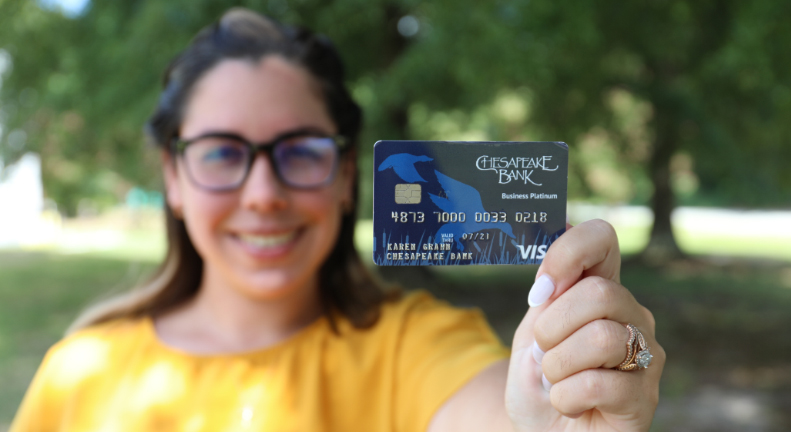

## Table of Contents:
1. [Credit Card Applications Data](#one)<br>
2. [Inspecting the applications](#two)<br>
3. [Splitting the dataset into train and test sets](#three)<br>
4. [Handling the missing values (part I)](#four)<br>
5. [Handling the missing values (part II)](#five)<br>
6. [Handling the missing values (part III)](#six)<br>
7. [New Summaries](#seven)<br>
8. [Exploratory Data Analysis (EDA)](#eight)<br>
9. [Preprocessing the data (part I)](#nine)<br>
10. [Preprocessing the data (part II)](#ten)<br>
11. [Fitting a logistic regression model to the train set](#eleven)<br>
12. [Making predictions and evaluating performance](#twelve)<br>
13. [Grid searching and making the model perform better](#thirteen)<br>
14. [Finding the best performing model](#fourteen)<br>
<br>

<p>Commercial banks receive <em>a lot</em> of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning, and almost all commercial banks do so. In this notebook, we will build an automatic credit card approval predictor using machine learning techniques, just like banks.</p>

<p>We'll use the <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from the UCI Machine Learning Repository. The structure of this notebook is as follows:</p>
<ul>
<li>First, we will start off by loading and viewing the dataset.</li>
<li>We will see that the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.</li>
<li>We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.</li>
<li>After our data is in good shape, we will do some exploratory data analysis to build our intuitions.</li>
<li>Finally, we will build a machine learning model that can predict if an individual's application for a credit card will be accepted.</li>
</ul>

<a id="one"></a>
## 1| Credit Card Applications Data

<p>We find that since this data is confidential, the contributor of the dataset has anonymized the feature names.</p>

In [59]:
# Import pandas
import pandas as pd

# Load dataset
cc_apps = pd.read_csv("cc_approvals.data",header=None)

# Inspect data
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


<a id="two"></a>
## 2| Inspecting the applications
<p>The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application. The features of this dataset have been anonymized to protect the privacy, but <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">this blog</a> gives us a pretty good overview of the probable features. The probable features in a typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.   </p>
<p>As we can see from our first glance at the data, the dataset has a mixture of numerical and non-numerical features. This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.</p>

In [60]:
# Print summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print('\n')

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print('\n')

# Inspect missing values in the dataset
cc_apps.tail(30)

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 no

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
660,b,22.25,9.000,u,g,aa,v,0.085,f,f,0,f,g,00000,0,-
661,b,29.83,3.500,u,g,c,v,0.165,f,f,0,f,g,00216,0,-
662,a,23.50,1.500,u,g,w,v,0.875,f,f,0,t,g,00160,0,-
663,b,32.08,4.000,y,p,cc,v,1.500,f,f,0,t,g,00120,0,-
664,b,31.08,1.500,y,p,w,v,0.040,f,f,0,f,s,00160,0,-
665,b,31.83,0.040,y,p,m,v,0.040,f,f,0,f,g,00000,0,-
666,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,00180,0,-
667,a,17.92,0.540,u,g,c,v,1.750,f,t,1,t,g,00080,5,-
668,b,30.33,0.500,u,g,d,h,0.085,f,f,0,t,s,00252,0,-
669,b,51.83,2.040,y,p,ff,ff,1.500,f,f,0,f,g,00120,1,-


<p>Ah ha! Row 673 has a ? in column 0, indicating a potential missing value. We now know what to look for when further inspecting the data.</p>

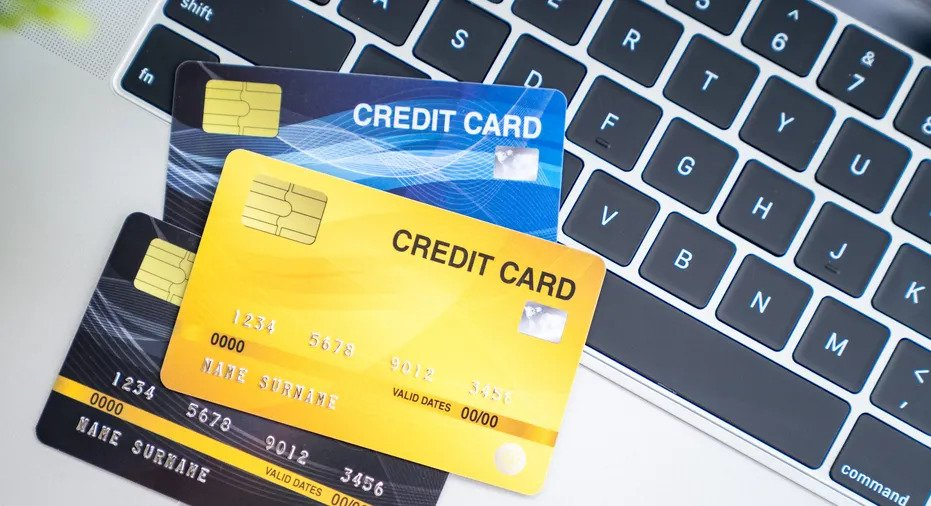

<a id="three"></a>
## 3| Splitting the dataset into train and test sets
<p>Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to preprocess the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then preprocess it.</p>
<p>Also, features like <code>DriversLicense</code> and <code>ZipCode</code> are likely not important so we should drop them to design our machine learning model with the best set of features. In Data Science literature, this is often referred to as <em>feature selection</em>. </p>

In [61]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13
cc_apps = cc_apps.drop(cc_apps.columns[[11,13]],axis=1)

# Split into train and test sets
cc_apps_train, cc_apps_test = train_test_split(cc_apps, test_size=0.33, random_state=42)

<a id="four"></a>
## 4| Handling the missing values (part I)
<p>Now we've split our data, we can handle some of the issues we identified when inspecting the DataFrame, including:</p>
<ul>
<li>Our dataset contains both numeric and non-numeric data (specifically data that are of <code>float64</code>, <code>int64</code> and <code>object</code> types). Specifically, the features 2, 7, 10 and 14 contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.</li>
<li>The dataset also contains values from several ranges. Some features have a value range of 0 - 28, and some have a range up to 100000. Apart from these, we can get useful statistical information (like <code>mean</code>, <code>max</code>, and <code>min</code>) about the features that have numerical values. </li>
<li>Finally, the dataset has missing values, which we'll take care of in this task. The missing values in the dataset are labeled with '?', which can be seen in the last cell's output of the second task.</li>
</ul>
<p>Now, let's temporarily replace these missing value question marks with NaN.</p>

In [62]:
# Import numpy
import numpy as np

# Replace the '?'s with NaN in the train and test sets
cc_apps_train = cc_apps_train.replace("?",np.nan)
cc_apps_test = cc_apps_test.replace("?",np.nan)

<a id="five"></a>
## 5| Handling the missing values (part II)
<p>We replaced all the question marks with NaNs. This is going to help us in the next missing value treatment that we are going to perform.</p>
<p>An important question that gets raised here is <em>why are we giving so much importance to missing values</em>? Can't they be just ignored? Ignoring missing values can affect the performance of a machine learning model heavily. While ignoring the missing values our machine learning model may miss out on information about the dataset that may be useful for its training. Then, there are many models which cannot handle missing values implicitly such as Linear Discriminant Analysis (LDA). </p>
<p>So, to avoid this problem, we are going to impute the missing values with a strategy called mean imputation.</p>

In [63]:
import warnings
warnings.filterwarnings('ignore')

# Impute the missing values with mean imputation
cc_apps_train.fillna(cc_apps_train.mean(), inplace=True)
cc_apps_test.fillna(cc_apps_test.mean(), inplace=True)

# Count the number of NaNs in the datasets and print the counts to verify
print(cc_apps_train.isnull().sum())
print(cc_apps_test.isnull().sum())

0     8
1     5
2     0
3     6
4     6
5     7
6     7
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64
0     4
1     7
2     0
3     0
4     0
5     2
6     2
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64


<a id="six"></a>
## 6| Handling the missing values (part III)
<p>We have successfully taken care of the missing values present in the numeric columns. There are still some missing values to be imputed for columns 0, 1, 3, 4, 5, and 6. All of these columns contain non-numeric data and this is why the mean imputation strategy would not work here. This needs a different treatment. </p>
<p>We are going to impute these missing values with the most frequent values as present in the respective columns. This is a good practice when it comes to imputing missing values for categorical data in general.</p>

In [64]:
# Iterate over each column of cc_apps_train
for col in cc_apps_train.columns:
    # Check if the column is of object type
    if cc_apps_train[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_apps_train = cc_apps_train.fillna(cc_apps_train[col].value_counts().index[0])
        cc_apps_test = cc_apps_test.fillna(cc_apps_train[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(cc_apps_train.isnull().sum())
print(cc_apps_test.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
12    0
14    0
15    0
dtype: int64


<a id="seven"></a>
## 7| New Summaries
<p>We now check the values of the features to make sure nothing seems out of place. It makes sense that the test set has less values since it is one-third of the data set. The categorical features only have data for <code>count</code>, <code>unique</code>, <code>top</code>, and <code>freq</code>. In opposite fashion, the numerical features do not have data for <code>unique</code>, <code>top</code>, and <code>freq</code>, but have it for everything else. Our next stop is Exploratory Data Analysis.</p>

In [33]:
test_sum = cc_apps_test.describe(include='all')
round(test_sum, 2)

,0,1,2,3,4,5,6,7,8,9,10,12,14,15
count,228,228,228.00,228,228,228,228,228.00,228,228,228.00,228,228.00,228
unique,2,176,NaN,3,3,15,9,NaN,2,2,NaN,3,NaN,2
top,b,b,NaN,u,g,c,v,NaN,t,f,NaN,g,NaN,-
freq,158,7,NaN,178,178,46,138,NaN,123,135,NaN,204,NaN,125
mean,NaN,NaN,4.98,NaN,NaN,NaN,NaN,2.59,NaN,NaN,2.25,NaN,1096.77,NaN
std,NaN,NaN,5.37,NaN,NaN,NaN,NaN,3.95,NaN,NaN,4.45,NaN,5306.78,NaN
min,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,0.00,NaN
25%,NaN,NaN,0.95,NaN,NaN,NaN,NaN,0.21,NaN,NaN,0.00,NaN,0.00,NaN
50%,NaN,NaN,2.50,NaN,NaN,NaN,NaN,1.15,NaN,NaN,0.00,NaN,1.00,NaN
75%,NaN,NaN,8.12,NaN,NaN,NaN,NaN,3.00,NaN,NaN,3.00,NaN,346.75,NaN


In [34]:
train_sum = cc_apps_train.describe(include='all')
round(train_sum, 2)

,0,1,2,3,4,5,6,7,8,9,10,12,14,15
count,462,462,462.00,462,462,462,462,462.00,462,462,462.00,462,462.00,462
unique,2,286,NaN,4,4,15,10,NaN,2,2,NaN,3,NaN,2
top,b,23.58,NaN,u,g,c,v,NaN,t,f,NaN,g,NaN,-
freq,322,6,NaN,341,341,91,261,NaN,238,260,NaN,421,NaN,258
mean,NaN,NaN,4.65,NaN,NaN,NaN,NaN,2.04,NaN,NaN,2.48,NaN,978.21,NaN
std,NaN,NaN,4.78,NaN,NaN,NaN,NaN,2.99,NaN,NaN,5.06,NaN,5167.08,NaN
min,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.00,NaN,0.00,NaN
25%,NaN,NaN,1.04,NaN,NaN,NaN,NaN,0.16,NaN,NaN,0.00,NaN,0.00,NaN
50%,NaN,NaN,2.86,NaN,NaN,NaN,NaN,1.00,NaN,NaN,0.00,NaN,7.00,NaN
75%,NaN,NaN,7.00,NaN,NaN,NaN,NaN,2.50,NaN,NaN,3.00,NaN,442.00,NaN


<a id="eight"></a>
## 8| Exploratory Data Analysis (EDA)
<p>We have now arrived at EDA. Distributions are explored, and outliers are detected. A histogram is used to display data using bars of different heights. In a histogram, each bar groups numbers into ranges. Taller bars show that more data falls in that range. A histogram displays the shape and spread of continuous sample data. A box plot graphically depicts groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of box to show the range of the data. By default, they extend no more than 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box, ending at the farthest data point within that interval. Outliers are plotted as separate dots.</p>
<p>All the histograms have a right skew, signaling that many outliers have high values away from the 50% or the median value. The box plots further confirm this point. Especially on column 14, which is the income. Most values are below 20000, but there is lone point near 10000.</p>

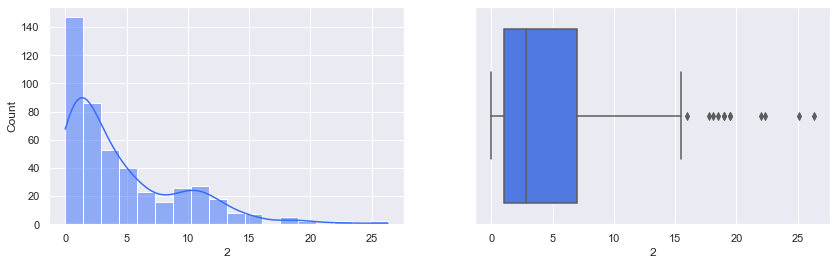

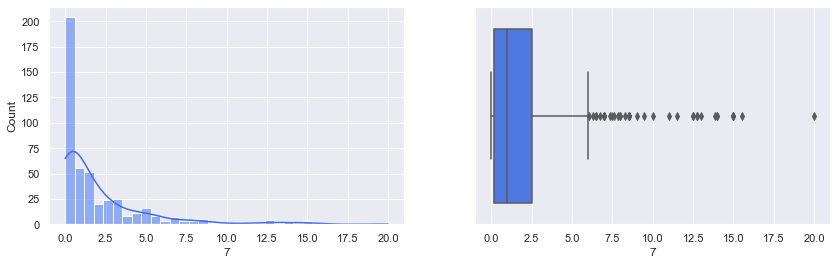

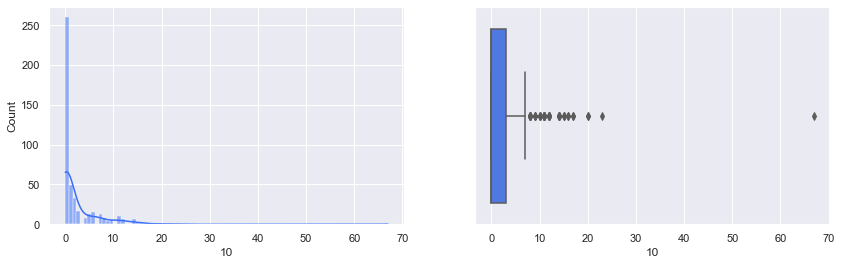

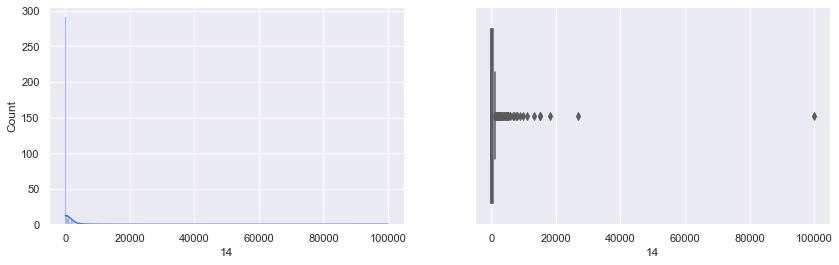

In [68]:
# Import matplotlib, seaborn, and set the style
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid',palette='rainbow')

# Loop over the numerical columns
numerical = cc_apps_train.select_dtypes('number').columns
for col in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(14,4))
    
    # Histogram plot with kde to estimate the probability
    sns.histplot(data=cc_apps_train, x=col, kde=True, ax=ax[0])
    
    # Box plot to get get interquartile range
    sns.boxplot(data=cc_apps_train, x=col, ax=ax[1])

<p>Features like <code>ApprovalStatus</code>, <code>Gender</code>, <code>PriorDefault</code>, and <code>Employed</code> are now given a closer look. </p>
    
<p> More people have been rejected for a credit card than approved, but the difference is not that wide. <code>Gender</code> does have an imbalance. However, we do not know what 'b' or 'a' stand for. <code>PriorDefault</code> is even, with more t's than f's, while the opposite is true for <code>Employed</code>. Again, we are not certain what the letters stand for.</p>

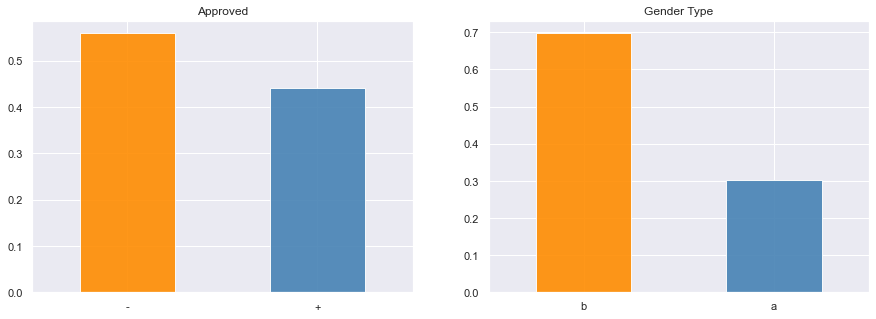

Counter({'-': 258, '+': 204})
Counter({'b': 322, 'a': 140})


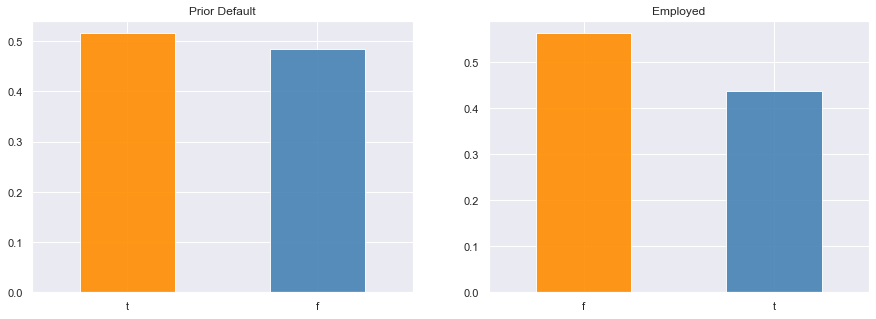

Counter({'t': 238, 'f': 224})
Counter({'f': 260, 't': 202})


In [56]:
# Import Counter
from collections import Counter

# Create first two bar charts
fig, axes = plt.subplots(1, 2,  figsize=(15, 5))
ax1 = plt.subplot2grid((1,2),(0,0))
cc_apps_train[15].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Approved')

ax1 = plt.subplot2grid((1,2),(0,1))
cc_apps_train[0].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Gender Type')
plt.show()

print(Counter(cc_apps_train[15]))
print(Counter(cc_apps_train[0]))

# Create another two bar charts
fig, axes = plt.subplots(1, 2,  figsize=(15, 5))
ax1 = plt.subplot2grid((1,2),(0,0))
cc_apps_train[8].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Prior Default')

ax1 = plt.subplot2grid((1,2),(0,1))
cc_apps_train[9].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Employed')
plt.show()

print(Counter(cc_apps_train[8]))
print(Counter(cc_apps_train[9]))

<a id="nine"></a>
## 9| Preprocessing the data (part I)
<p>The missing values are now successfully handled.</p>
<p>There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into two main tasks:</p>
<ol>
<li>Convert the non-numeric data into numeric.</li>
<li>Scale the feature values to a uniform range.</li>
</ol>
<p>First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models (like XGBoost) (and especially the ones developed using scikit-learn) require the data to be in a strictly numeric format. We will do this by using the <code>get_dummies()</code> method from pandas.</p>

In [47]:
# Convert the categorical features in the train and test sets independently
cc_apps_train = pd.get_dummies(cc_apps_train)
cc_apps_test = pd.get_dummies(cc_apps_test)

# Reindex the columns of the test set aligning with the train set
cc_apps_test = cc_apps_test.reindex(columns=cc_apps_train.columns,\
                                    fill_value=0)

<a id="ten"></a>
## 10| Preprocessing the data (part II)
<p>Now, we are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data. </p>
<p>Now, let's try to understand what these scaled values mean in the real world. Let's use <code>CreditScore</code> as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a <code>CreditScore</code> of 1 is the highest since we're rescaling all the values to the range of 0-1.</p>

In [49]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Segregate features and labels into separate variables
X_train, y_train = cc_apps_train.iloc[:,:-1].values,\
cc_apps_train.iloc[:,[-1]].values
X_test, y_test = cc_apps_test.iloc[:,:-1].values,\
cc_apps_test.iloc[:,[-1]].values

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

<a id="eleven"></a>
## 11| Fitting a logistic regression model to the train set
<p>Essentially, predicting if a credit card application will be approved or not is a <a href="https://en.wikipedia.org/wiki/Statistical_classification">classification</a> task. According to UCI, our dataset contains more instances that correspond to "Denied" status than instances corresponding to "Approved" status. Specifically, out of 690 instances, there are 383 (55.5%) applications that got denied and 307 (44.5%) applications that got approved. </p>
<p>This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the applications with respect to these statistics.</p>
<p>Which model should we pick? A question to ask is: <em>are the features that affect the credit card approval decision process correlated with each other?</em> Although we can measure correlation, that is outside the scope of this notebook, so we'll rely on our intuition that they indeed are correlated for now. Because of this correlation, we'll take advantage of the fact that generalized linear models perform well in these cases. Let's start our machine learning modeling with a Logistic Regression model (a generalized linear model).</p>

In [51]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<a id="twelve"></a>
## 12| Making predictions and evaluating performance
<p>But how well does our model perform? </p>
<p>We will now evaluate our model on the test set with respect to <a href="https://developers.google.com/machine-learning/crash-course/classification/accuracy">classification accuracy</a>. But we will also take a look the model's <a href="http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/">confusion matrix</a>. In the case of predicting credit card applications, it is important to see if our machine learning model is equally capable of predicting approved and denied status, in line with the frequency of these labels in our original dataset. If our model is not performing well in this aspect, then it might end up approving the application that should have been approved. The confusion matrix helps us to view our model's performance from these aspects.  </p>

In [53]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ",\
      logreg.score(rescaledX_test,y_test))

# Print the confusion matrix of the logreg model
print(confusion_matrix(y_test,y_pred))

Accuracy of logistic regression classifier:  1.0
[[100   0]
 [  0 128]]


<a id="thirteen"></a>
## 13| Grid searching and making the model perform better
<p>Our model was pretty good! In fact it was able to yield an accuracy score of 100%.</p>
<p>For the confusion matrix, the first element of the of the first row of the confusion matrix denotes the true negatives meaning the number of negative instances (denied applications) predicted by the model correctly. And the last element of the second row of the confusion matrix denotes the true positives meaning the number of positive instances (approved applications) predicted by the model correctly.</p>
<p>But if we hadn't got a perfect score what's to be done?. We can perform a <a href="https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/">grid search</a> of the model parameters to improve the model's ability to predict credit card approvals.</p>
<p><a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">scikit-learn's implementation of logistic regression</a> consists of different hyperparameters but we will grid search over the following two:</p>
<ul>
<li>tol</li>
<li>max_iter</li>
</ul>

In [55]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01,0.001,0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

<a id="fourteen"></a>
## 14| Finding the best performing model
<p>We have defined the grid of hyperparameter values and converted them into a single dictionary format which <code>GridSearchCV()</code> expects as one of its parameters. Now, we will begin the grid search to see which values perform best.</p>
<p>We will instantiate <code>GridSearchCV()</code> with our earlier <code>logreg</code> model with all the data we have. We will also instruct <code>GridSearchCV()</code> to perform a <a href="https://www.dataschool.io/machine-learning-with-scikit-learn/">cross-validation</a> of five folds.</p>
<p>We'll end the notebook by storing the best-achieved score and the respective best parameters.</p>
<p>While building this credit card predictor, we tackled some of the most widely-known preprocessing steps such as <strong>scaling</strong>, <strong>label encoding</strong>, and <strong>missing value imputation</strong>. We finished with some <strong>machine learning</strong> to predict if a person's application for a credit card would get approved or not given some information about that person.</p>

In [57]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train,y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_,\
grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
print("Accuracy of logistic regression classifier: ",\
      best_model.score(rescaledX_test,y_test))

Best: 1.000000 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  1.0
